In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../')
import utils

In [17]:
CALIBRATION_FILE = '../../../calibration/out/C.mat'
DATA_FILE = '../../../experiment_data/blue_feet/6/2016.10.08_21.32.12_trial_imudata.txt'

In [18]:
utils.print_header(DATA_FILE)

%  Data file recorded 2016/10/8  21:32:12
%  Stride Frequency         = [1, 1]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [5000, 400, 200, 0, 300, 5000, 400, 200, 0, 300]



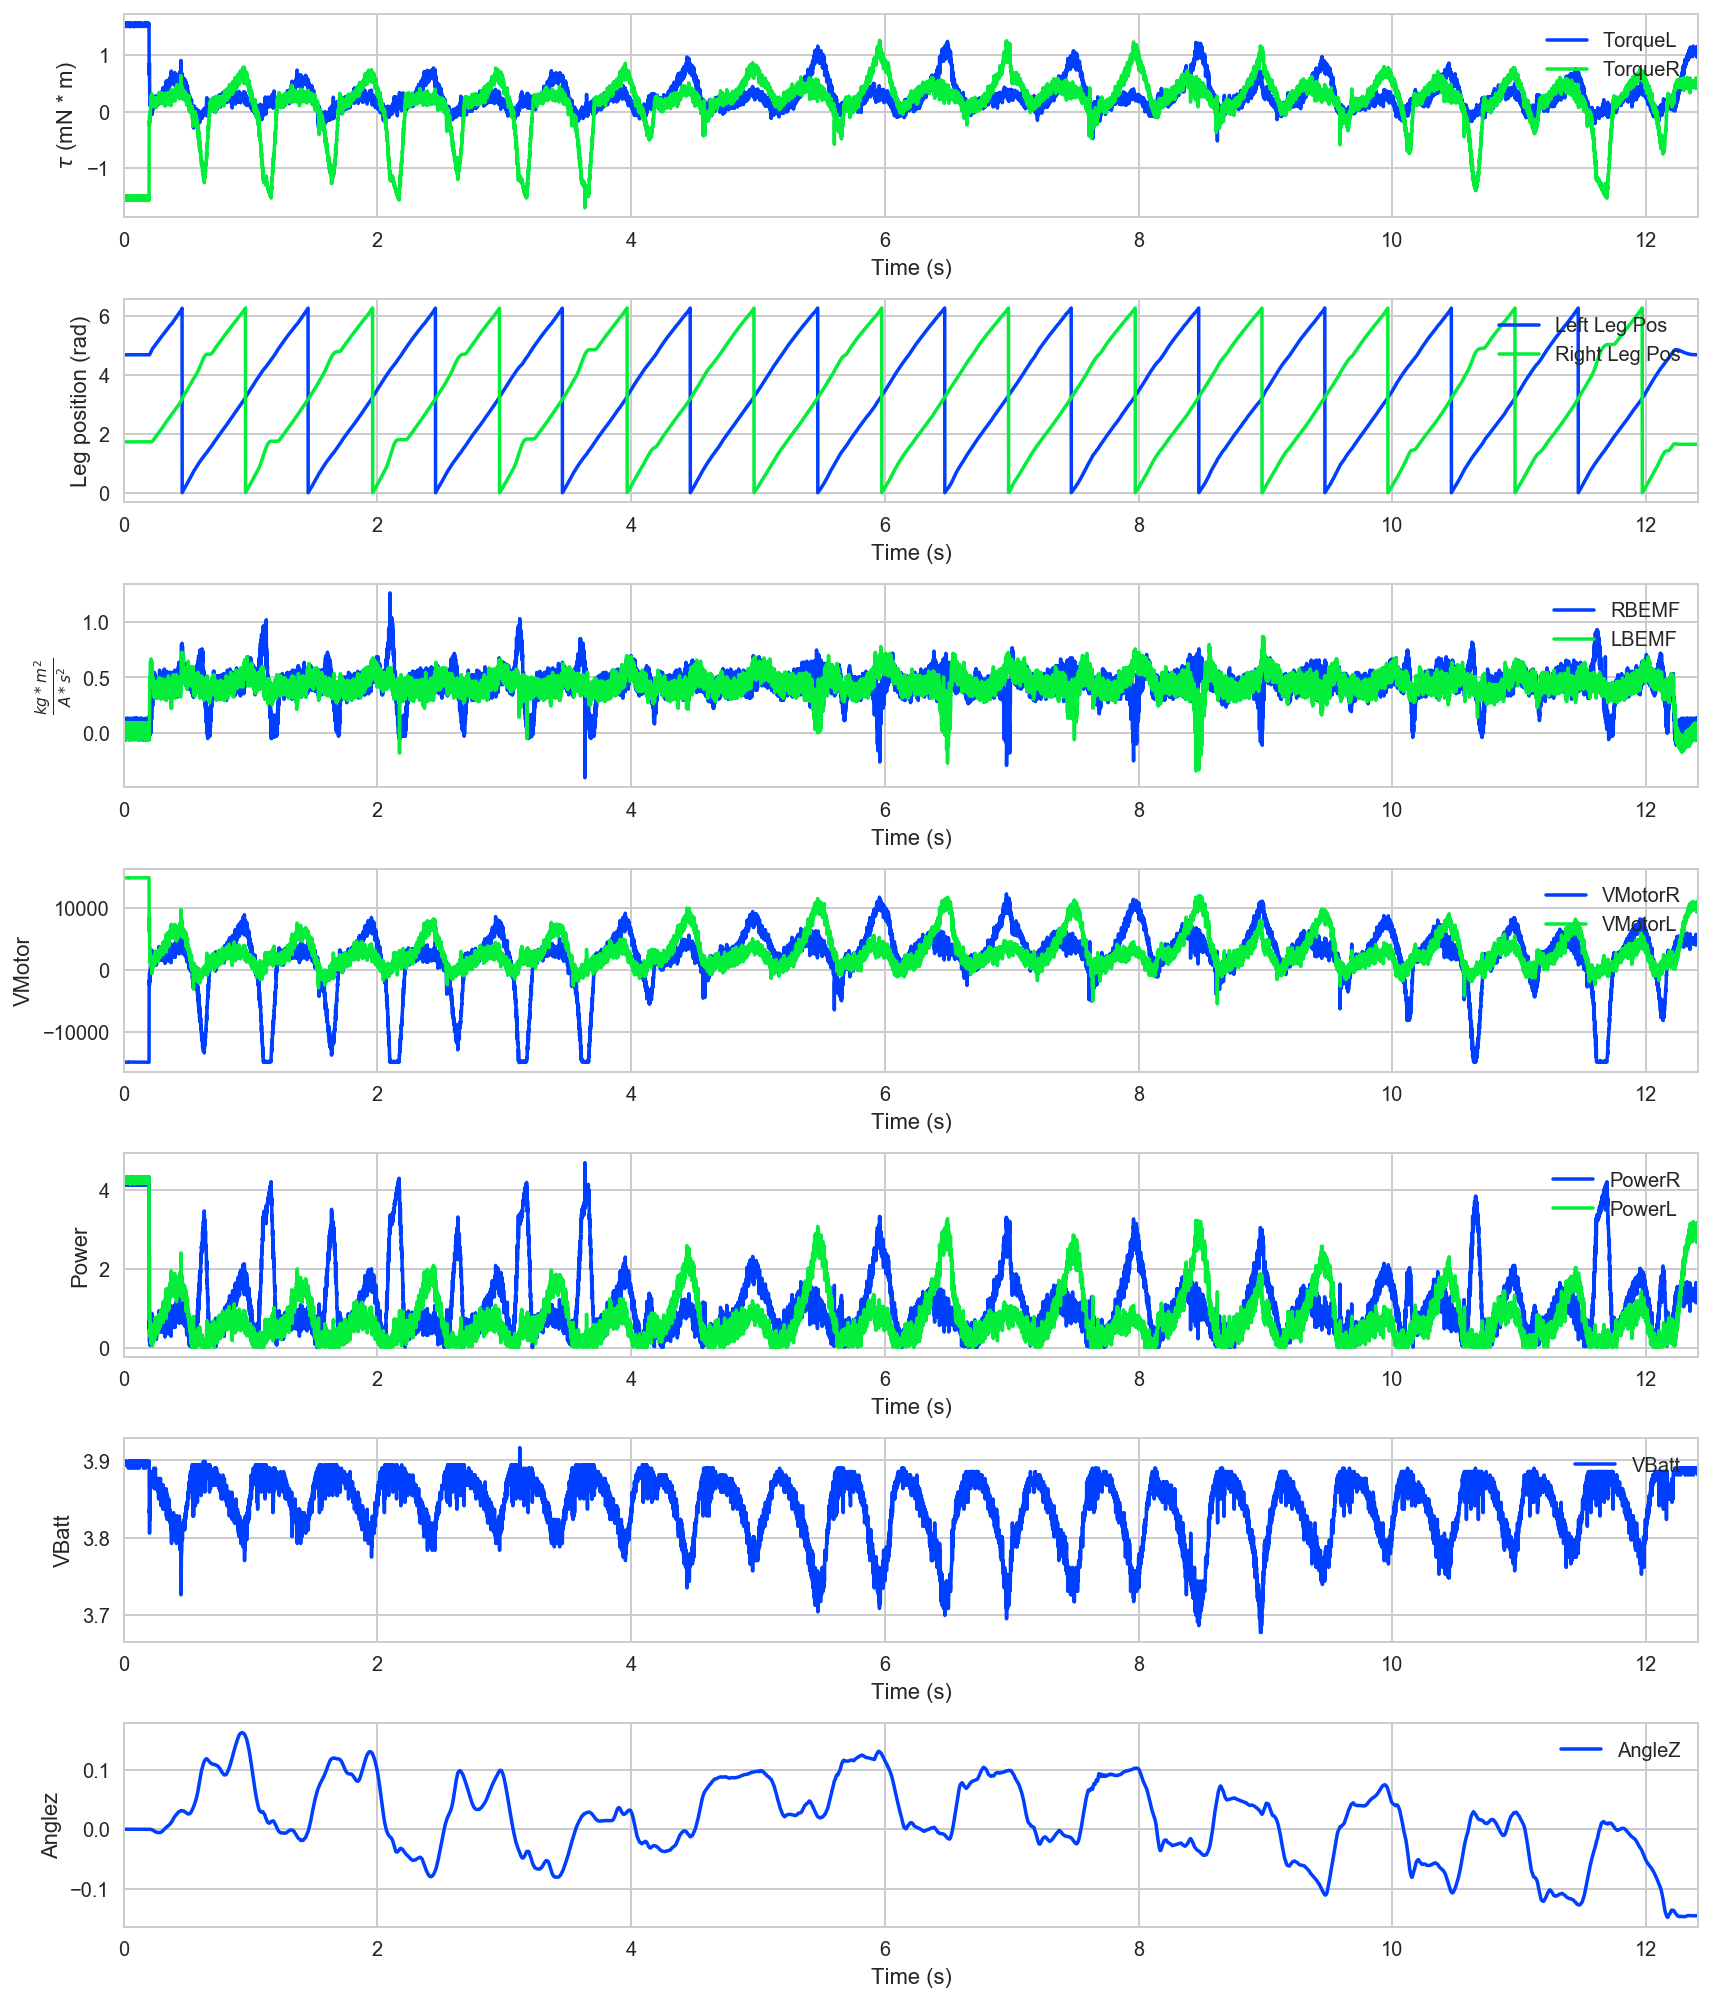

In [19]:
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)
utils.plot_columns(df, [['TorqueL', 'TorqueR'], ['Left Leg Pos', 'Right Leg Pos'], ['RBEMF', 'LBEMF'], ['VMotorR', 'VMotorL'], ['PowerR', 'PowerL'], 'VBatt', 'AngleZ'], display=True, save_figure=False)

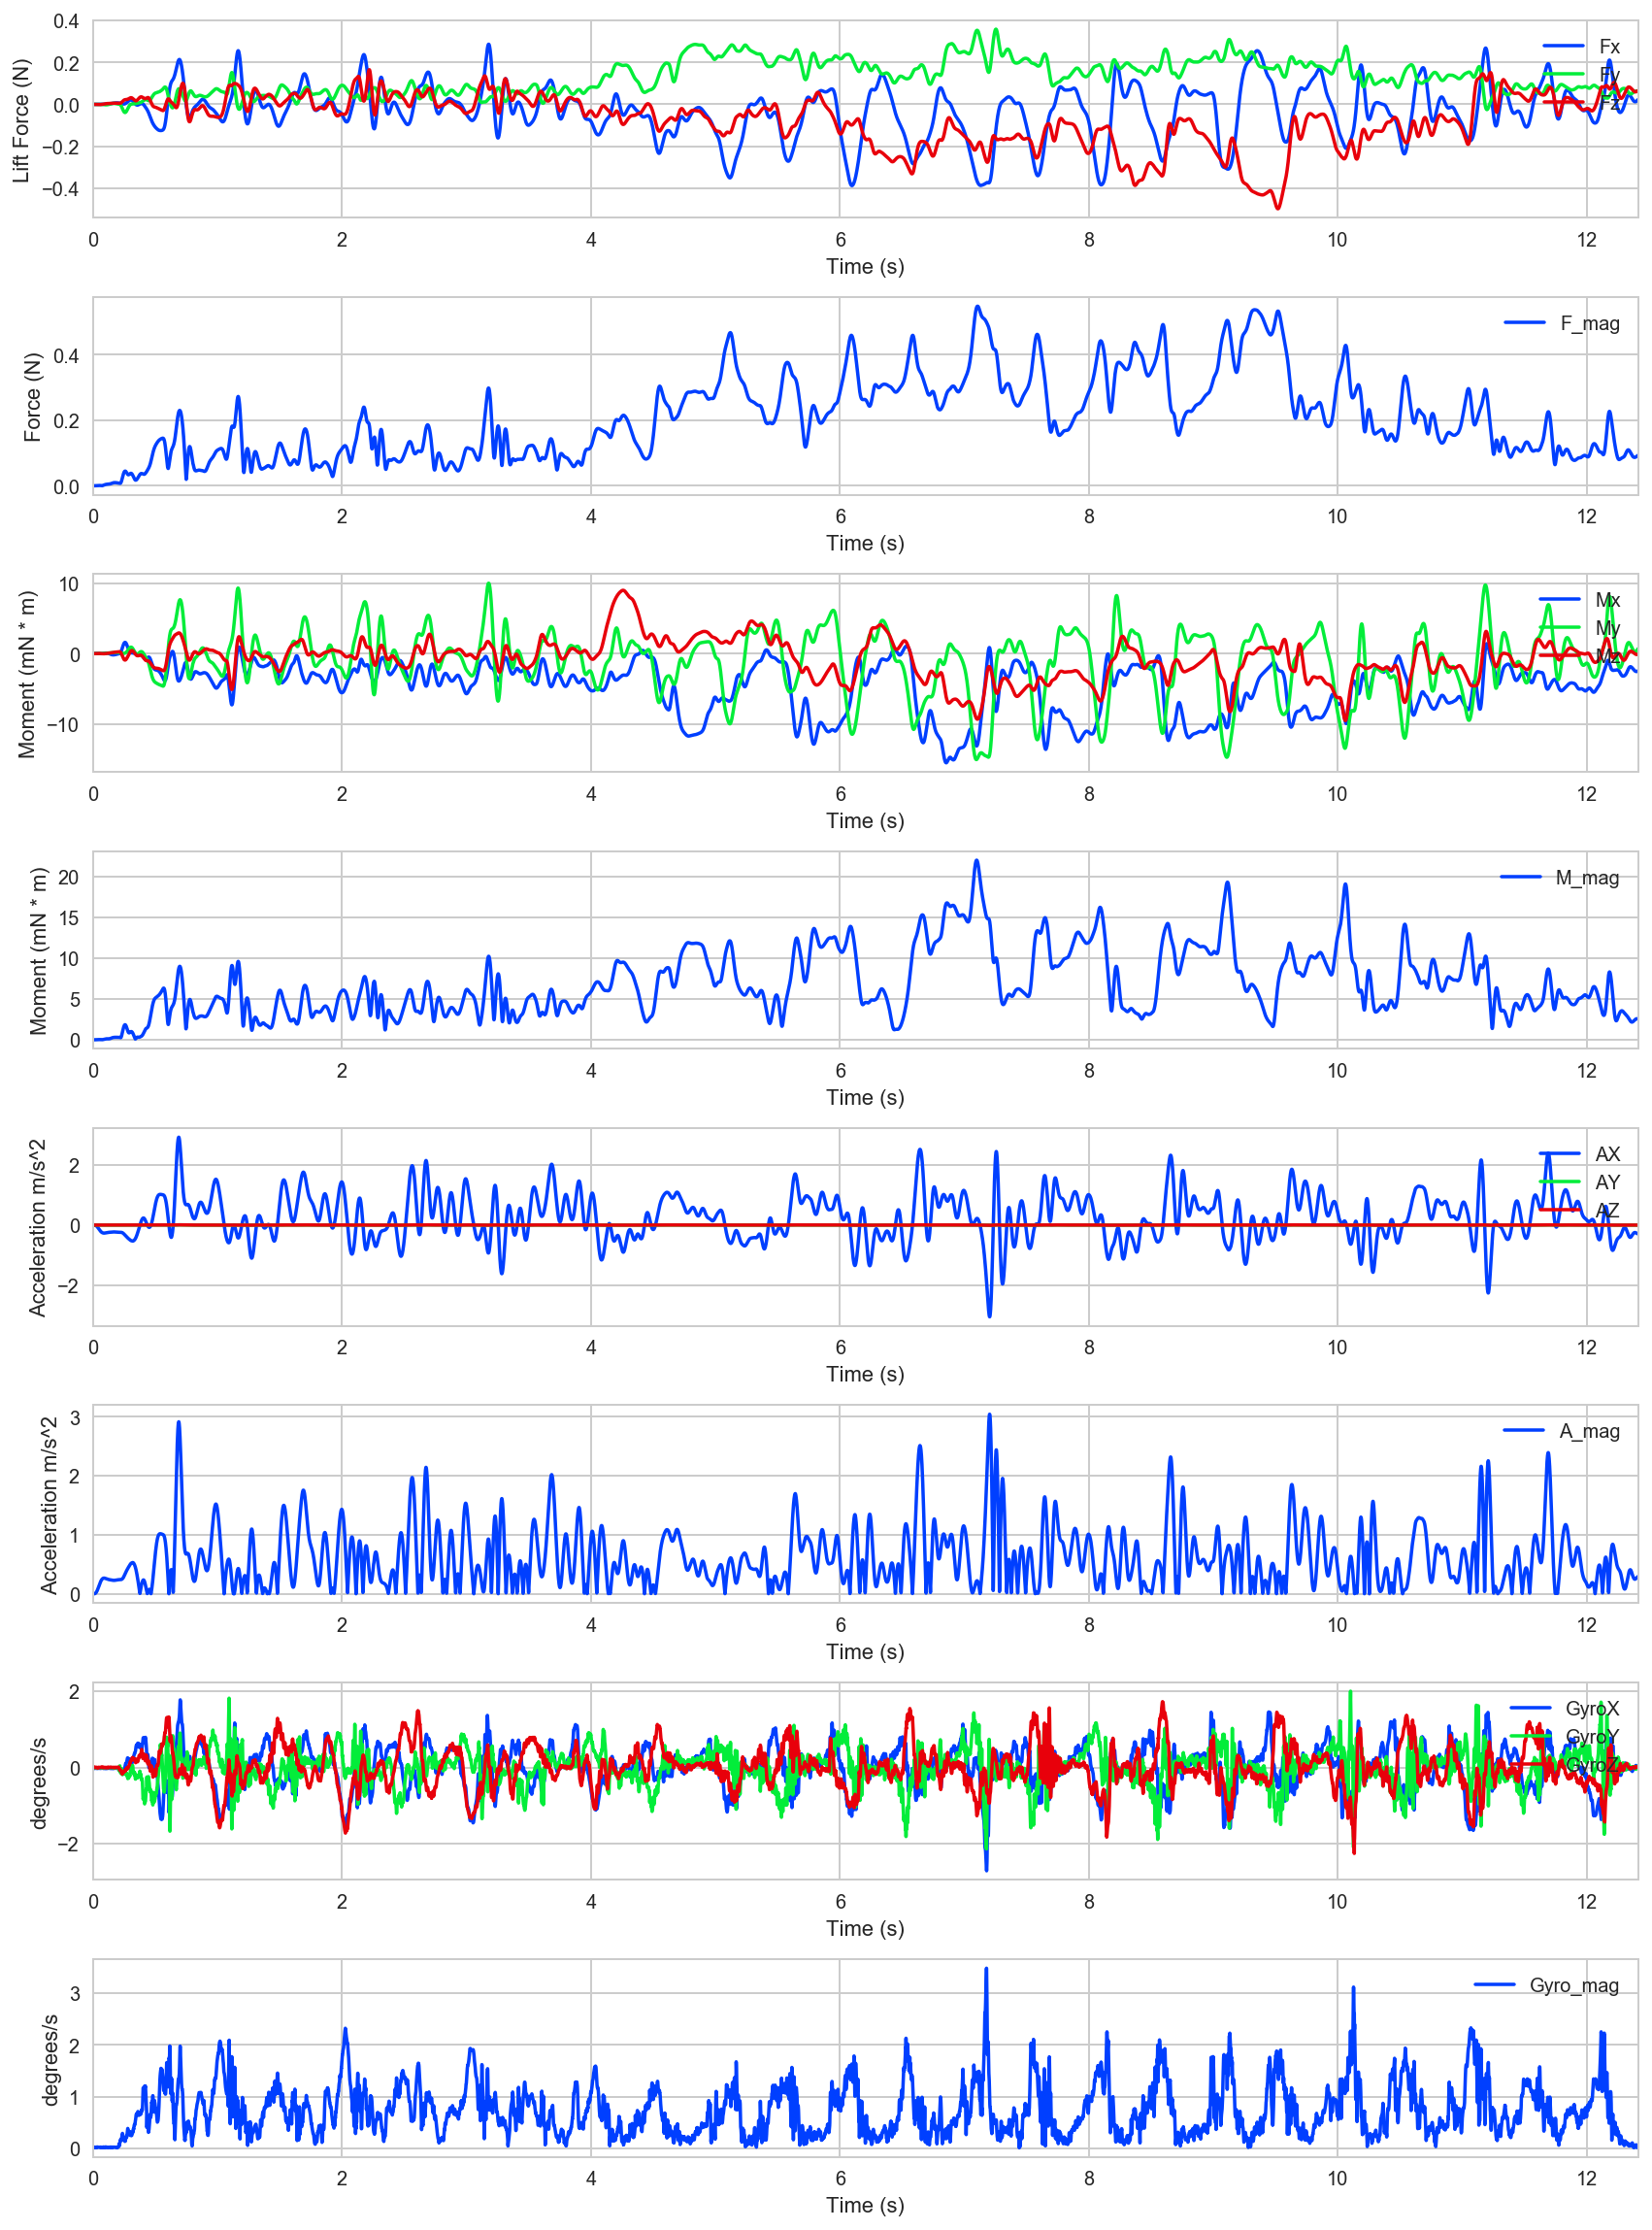

In [20]:
utils.plot_columns(df, [['Fx', 'Fy', 'Fz'], 'F_mag', ['Mx', 'My', 'Mz'], 'M_mag', ['AX', 'AY', 'AZ'], 'A_mag', ['GyroX', 'GyroY', 'GyroZ'], 'Gyro_mag'], display=True, save_figure=False)

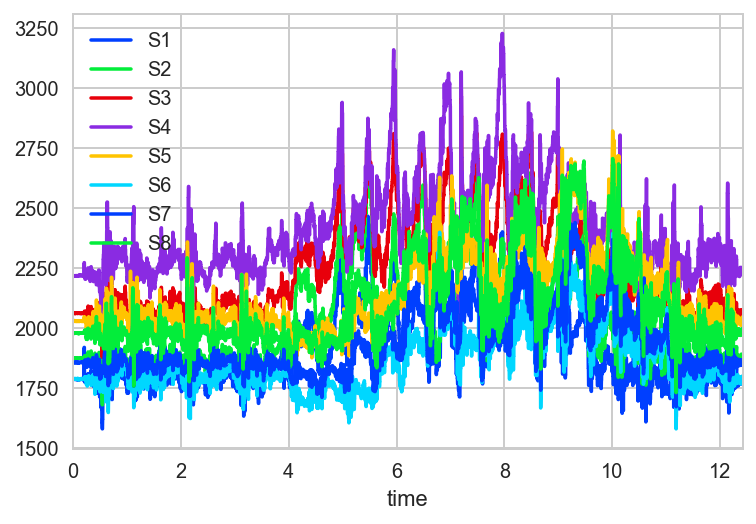

In [21]:
df.plot(x='time', y=['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'])

In [22]:
print "Here is the cost of transport for inside flaps"
cot = utils.cost_of_transport_inside_flaps(df, has_bottom_shell=False, v_avg=6.1595/100.,
                                           start_time=7000, end_time=11000, same_power_across_experiments=0)
print cot
     
    

Here is the cost of transport for inside flaps
power:1.806076181
40.7911505645


In [23]:
drag = utils.calculate_drag_energy(df, has_bottom_shell=False,start_time=7000,end_time=11000)
print drag

drag energy (kg*cm^2/s^2): 109.63293453
0.010963293453


In [24]:
electrical_energy = utils.calculate_electrical_energy(df, start_time=7000, end_time=11000)

electrical energy (Joules): 7.22430472401


In [25]:
import numpy as np
start = df['Right Leg Pos'][6500:7500].argmax()
end = df['Right Leg Pos'][11000:11500].argmax()
print start, end
print df['Right Leg Pos'][start]
print df['Right Leg Pos'][end]
starts = np.arange(start, end, step=1000)
ends = np.arange(start+1000, end+1000, step=1000)
intervals = np.vstack((starts, ends)).T
print intervals

6964 11499
6.28126817852
3.56497192502
[[ 6964  7964]
 [ 7964  8964]
 [ 8964  9964]
 [ 9964 10964]
 [10964 11964]]


In [26]:
drags = utils.get_drag_energy_from_list(df, False, intervals)
print drags

drag energy (kg*cm^2/s^2): 56.2699849088
drag energy (kg*cm^2/s^2): 23.9733577967
drag energy (kg*cm^2/s^2): 9.75677613626
drag energy (kg*cm^2/s^2): 17.6024741204
drag energy (kg*cm^2/s^2): 4.52284772701
[0.005626998490880127, 0.0023973357796705664, 0.0009756776136262613, 0.0017602474120383058, 0.00045228477270056045]
